# Продолжение решения Задачи 1 "Изучение критической температуры сверхпроводников"

Данные о сверхпроводниках взяты из базы данных сверхпроводящих материалов, собранной Национальным институтом материаловедения Японии NIMS.

Данные содержат сведения о 21 263 сверхпроводников.

Тренировочный набор - 17010 строк.
Тестовый набор - 4253 строк.
Для каждого сверхпроводника в данных приведены полная химическая формула сверхпроводника, а также 8 основных химических свойств (абсолютное значение, среднее, взвешенное среднее и так далее): атомная масса, энергия ионизации, радиус атома, плотность, удельная теплота плавления, энергия сродства к электрону, теплопроводность, валентность.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#считываем тренировочные данные
train = pd.read_csv('train.csv')
formula_train = pd.read_csv('formula_train.csv')

print(f'train dataset shape: {train.shape}')
print(f'formula_train dataset shape: {formula_train.shape}')

train dataset shape: (17010, 82)
formula_train dataset shape: (17010, 88)


In [3]:
#считываем тестовые данные
test = pd.read_csv('test.csv')
formula_test = pd.read_csv('formula_test.csv')

print(f'test dataset shape: {test.shape}')
print(f'formula_test dataset shape: {formula_test.shape}')

test dataset shape: (4253, 81)
formula_test dataset shape: (4253, 87)


In [4]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
test.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,5,92.729214,61.051113,73.132787,37.513930,1.449309,1.146919,122.90607,35.741099,47.094633,...,2.00,2.200000,1.888175,2.124829,1.557113,1.053346,2,1.114286,0.632456,0.550325
1,4,64.632217,55.790060,48.775792,35.178830,1.139875,0.931491,122.90607,35.851917,46.059083,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
2,4,76.444563,65.834647,59.356672,48.955994,1.199541,1.241867,121.32760,22.132267,43.823354,...,2.25,2.133333,2.213364,2.111100,1.368922,1.354710,1,0.266667,0.433013,0.339935
3,4,96.032850,77.279467,69.515930,53.611120,1.159784,1.267452,151.25960,22.543367,59.663892,...,2.25,2.166667,2.213364,2.139826,1.368922,1.351681,1,0.333333,0.433013,0.372678
4,4,96.451652,75.978308,69.689342,53.146925,1.158346,1.259726,152.93481,24.421050,60.166149,...,2.25,2.116667,2.213364,2.096882,1.368922,1.350047,1,0.316667,0.433013,0.321023


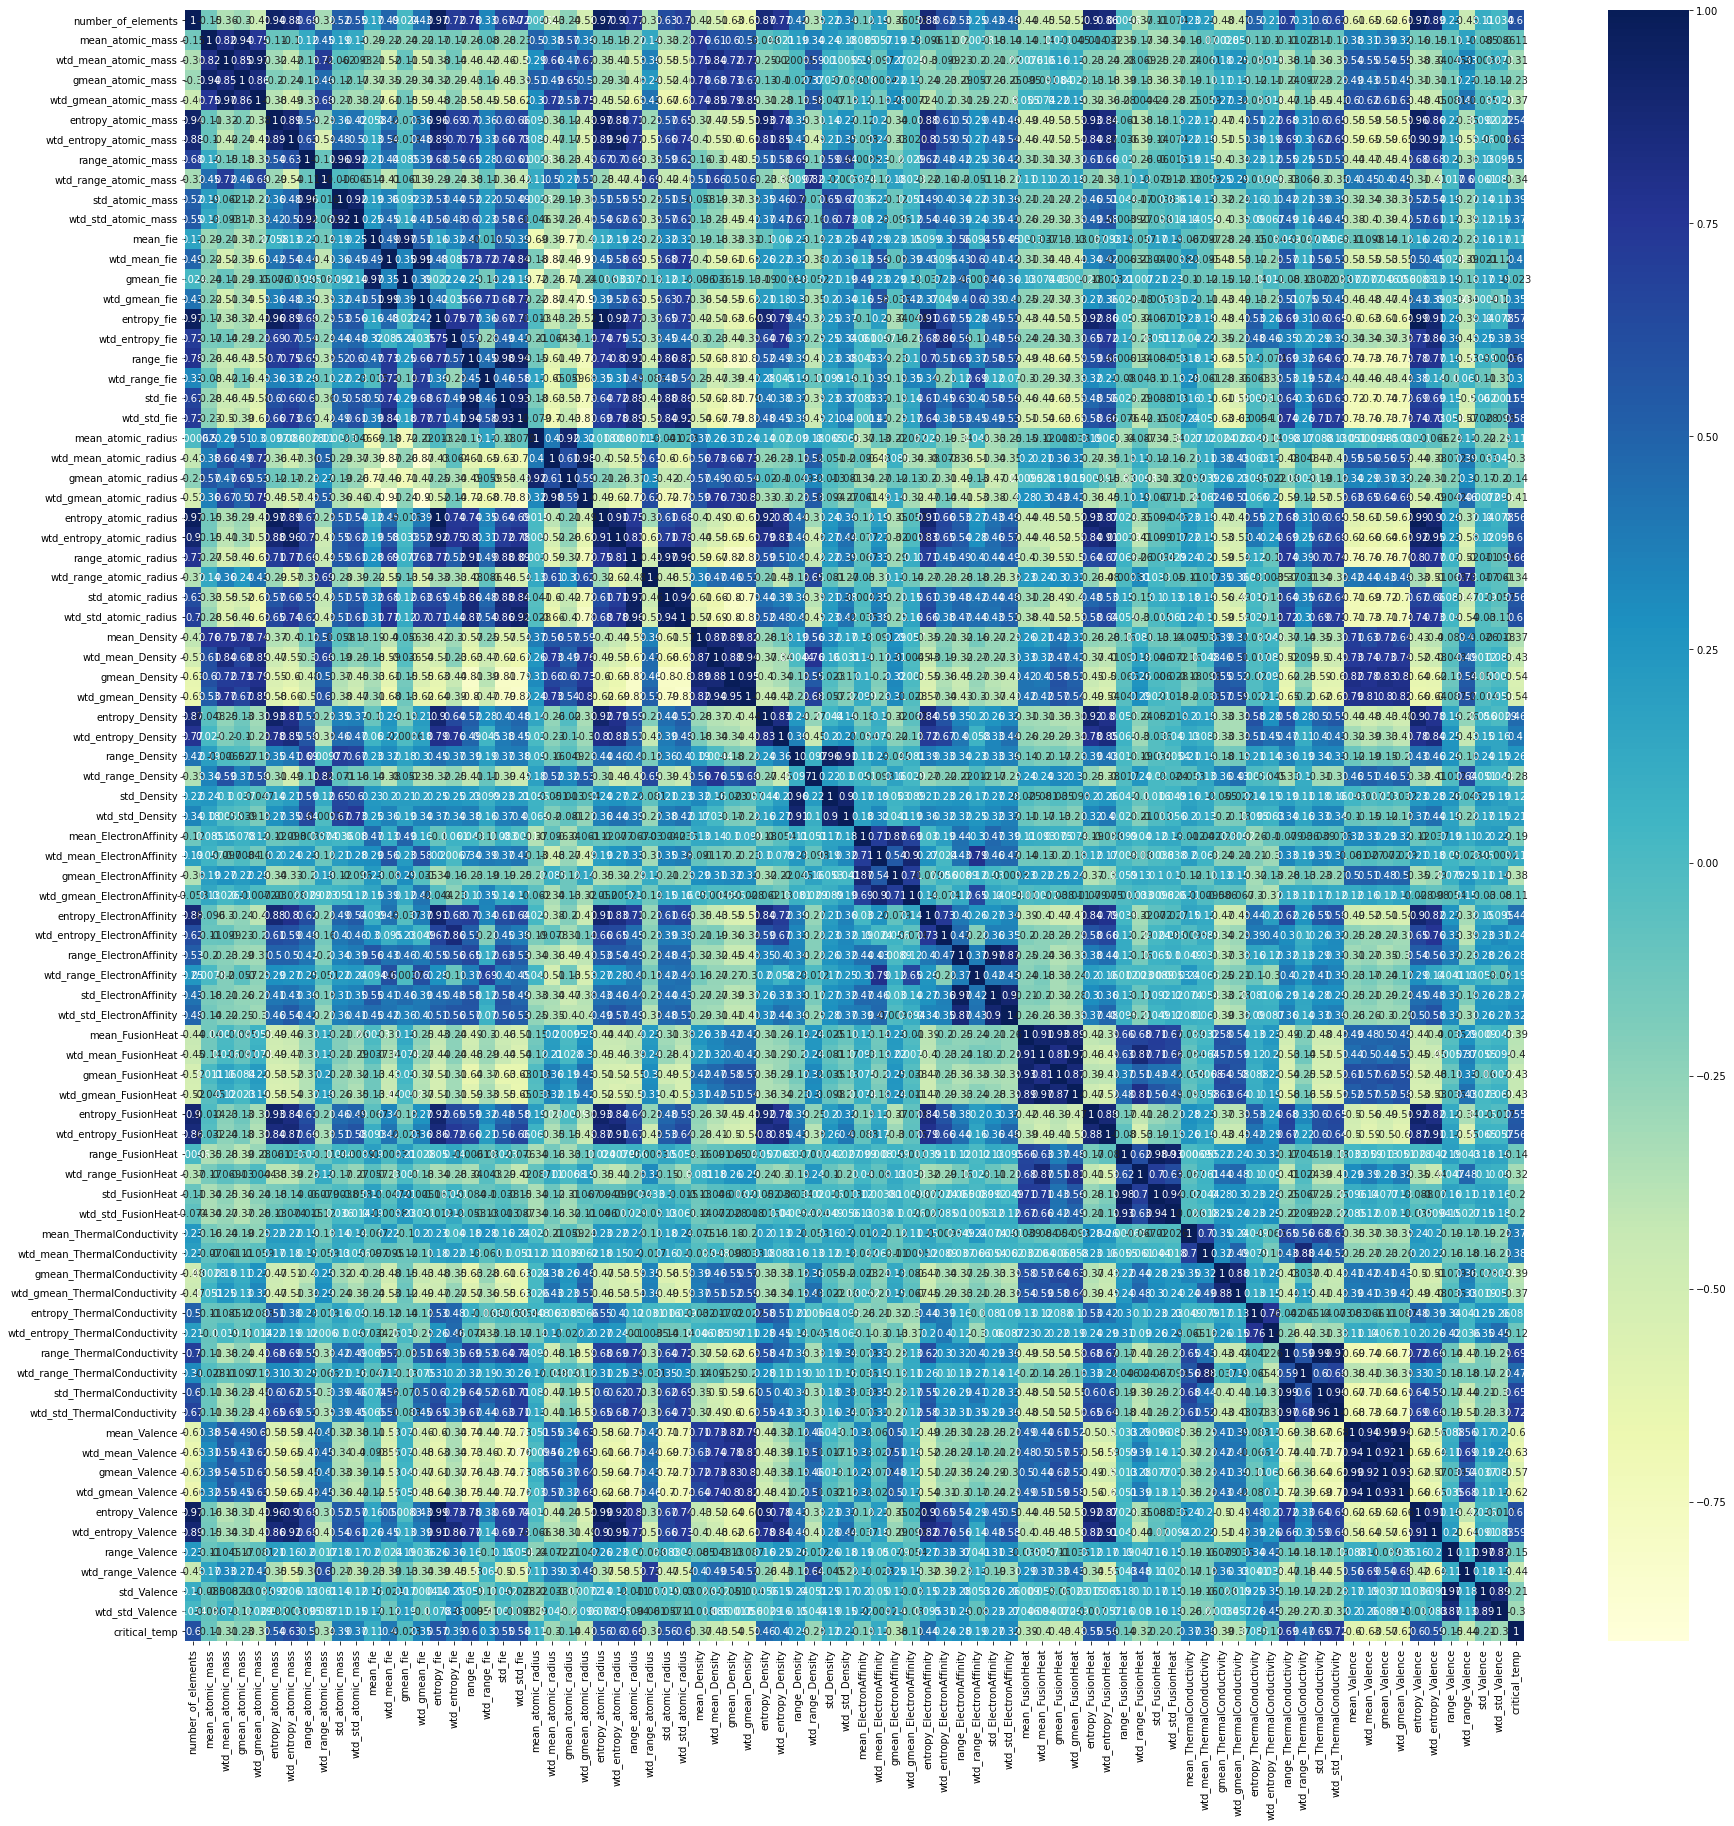

In [6]:
#построим корреляционную матрицу
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),cmap='YlGnBu', annot=True)

plt.savefig('train_corr')

## Предобработка данных

В данной задаче у нас имеются два датасета для тренировки и для теста, для удобства сформируем один DataFrame.

Так как колонка с целевой переменной имеется в обоих датасетах, удалим её из одного, чтобы не дублировать.

In [7]:
#обработаем входные данные
formula_train = formula_train.drop(columns=['critical_temp'])
train_full = pd.concat([train, formula_train], axis=1)
train_full.drop(columns=['material'], inplace=True)

In [8]:
test_full = pd.concat([test, formula_test], axis=1)
test_full.drop(columns=['material'], inplace=True)

In [9]:
train_full.shape

(17010, 168)

In [10]:
test_full.shape

(4253, 167)

In [11]:
#получим вектор признаков и ветокр ответов
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

In [12]:
#обучение модели
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))

12.364560736188512
274.024421509253
0.7675412330402197


In [13]:
#повторно проанализируем данные с данными
features = X.columns

coef_df = pd.DataFrame(model.coef_, columns = ['coefficient'])
coef_df['features'] = features

coef_df.sort_values(by = 'coefficient')

,coefficient,features
76,-72.740357,wtd_entropy_Valence
25,-32.314924,entropy_atomic_radius
5,-21.231740,entropy_atomic_mass
46,-19.343809,wtd_entropy_ElectronAffinity
55,-19.227184,entropy_FusionHeat
...,...,...
65,14.464442,entropy_ThermalConductivity
26,21.137260,wtd_entropy_atomic_radius
56,22.879520,wtd_entropy_FusionHeat
16,56.785104,wtd_entropy_fie


In [14]:
#удалим из X все невлияющтие на результат признаки
bellow_colls = list(coef_df[(coef_df['coefficient']>-1)&(coef_df['coefficient']<1)]['features'])

X = X.drop(columns=bellow_colls)

In [15]:
X.shape

(17010, 65)

### Масштабирование данных

**Масштабирование признаков**

Масштабированием называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. 

*Например, столбцы возраста и месячной зарплаты будут иметь совершенно разный диапазон.*

Это сильно искажает результаты таких алгоритмов, как *метод опорных векторов* и *метод k-ближайших соседей*, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. И хотя методы вроде *линейной регрессии* и *«случайного леса»* не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

**Существует два распространенных способа масштабирования:**

1. **Нормализация**

В данном случае все значения будут находиться в диапазоне от 0 до 1. Дискретные бинарные значения определяются как 0 и 1. 

Расчёт нового значения происходит по формуле:

$X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$


2. **Стандартизация**

Масштабирует значения с учетом стандартного отклонения. Если стандартное отклонение функций другое, их диапазон также будет отличаться друг от друга. Это снижает влияние выбросов в элементах. В следующей формуле стандартизации среднее значение показано как $μ$, а стандартное отклонение показано как $σ$.

$X_{std} = \frac{X-μ}{σ}$

Стандартизация приводит все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, к набору значений из распределения с **нулевым средним значением** и **единичным стандартным отклонением**. 

Пакет `sklearn.preprocessing` содержит в себе множество различных функции предобработки данных, в том числе функции, позволяющие выполнять масштабирование признаков:

- **StandardScaler()** - класс для стандартизации
- **MinMaxScaler()** - класс для нормализации

In [16]:
#масштабируем данные
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)

X_nm = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns, index=X.index)

In [17]:
X_std

,wtd_mean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,entropy_fie,wtd_entropy_fie,wtd_mean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,entropy_Density,...,Ho,Er,Yb,Lu,Os,Pt,Hg,Tl,Pb,Bi
0,-0.448791,0.044695,-0.003923,0.018605,-0.402987,-1.013326,-1.015824,-0.021575,0.186576,-0.113903,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
1,-0.429351,0.778422,-0.015470,0.642029,-0.356276,-1.032200,-1.020243,0.641734,0.179404,0.709940,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
2,-0.448123,0.044695,-0.218958,0.018605,-0.456521,-1.042134,-1.024588,-0.021575,0.003949,-0.113903,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
3,-0.448457,0.044695,-0.103719,0.018605,-0.427798,-1.027730,-1.020210,-0.021575,0.103204,-0.113903,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
4,-0.449460,0.044695,0.162372,0.018605,-0.361814,-0.984517,-1.007026,-0.021575,0.319338,-0.113903,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005,-0.590117,0.031940,0.473160,0.189191,0.003177,0.124665,0.372262,0.222450,-0.045879,0.622595,...,-0.088984,-0.105179,-0.057903,0.472167,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
17006,-0.710912,0.432772,1.263254,0.633815,0.187199,-0.787825,-0.873253,0.639053,0.994743,0.272481,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,3.402035,-0.147889,-0.304942
17007,0.670287,-1.301858,-1.328242,-1.597357,-1.150127,2.000638,1.980618,-1.537412,-1.632465,-1.150925,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942
17008,0.714358,-1.301858,-1.052813,-1.597357,-0.830272,1.889725,1.888104,-1.537412,-1.325486,-1.150925,...,-0.088984,-0.105179,-0.057903,-0.096128,-0.076196,-0.112676,-0.178365,-0.177721,-0.147889,-0.304942


## Обучение модели

В данном примере мы решаем задачу регрессии и для её решения воспользуемся алгоритмом Линейной регрессии.

In [18]:
#разделим данные на подвыборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

В нашем наборе данных 167 различных признаков, значит уравнение линейной регрессии будет выглядеть следующим образом в общем виде:

𝑦=𝑤0+𝑤1∗𝑥1+𝑤2∗𝑥2+...+𝑤167∗𝑥167
 
И задача линейной регрессии сводится к рассчёту коэффицентов (весов  𝑤𝑖
 ) при признаках  𝑥𝑖
 .

In [19]:
#обучение модели
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

14.115665459224212
353.4222003693943
0.6878178689136518


In [20]:
X_train.shape

(14458, 65)

## Предсказание ответа для тестового набора данных

In [21]:
#выгружаем результат
test_full = test_full.drop(columns=bellow_colls)

In [22]:
test_full.shape

(4253, 65)

In [23]:
y_pred_test = model2.predict(test_full)

In [24]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test=y_pred_test.reset_index()

y_pred_test.to_csv('solution.csv', index=False)